### Working with Data - Computer Lab for Guest Lecture Julia Lane
This is the notebook for the HW for Julia Lane's lecture on responsible data use. Instructions from https://github.com/fedhere/PUI2016_fb55/blob/master/Lab8_fb55/PUI%202016%20-%20Working%20with%20Data%20Lab.ipynb

OUTLINE:

Define a research question

Think about what data are available

Think about possible measurement errors

Think about the interpretation of your results

Inform your results by linking datasets

In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import re
import json
import requests
import urllib2
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as pl

#loading rcParams from JSON template (created from Federica's fbb_matplotlibrc.json)
url = 'https://s3.amazonaws.com/sb-public/sbg389_matplotlibrc.json'
resp = requests.get(url=url)
data = json.loads(resp.text)
pl.rcParams.update(data)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Notebook Instructions
# https://github.com/fedhere/PUI2016_fb55/blob/master/Lab8_fb55/PUI%202016%20-%20Working%20with%20Data%20Lab.ipynb

In [3]:
# Reading the data directly from the facility through compute
# Number of complains by community district
complainCalls = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,39,40,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Visually inspecting the columns
complainCalls.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,1-1-1173130914,NaN,NaN,NaN,NaN,NaN,NaN
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)"
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Explore the dateset columns
print (complainCalls.columns)

# There is a column for community board, explore value
complainCalls['Community Board'][0]

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

'13 BROOKLYN'

In [6]:
# Check if all Boroughs and Community Districts are represented in the Data
uniqueCommunityDistricts = complainCalls['Community Board'].unique()

In [7]:
# How many community districts are represented

# There are 59 community districts
# https://www1.nyc.gov/site/planning/community/community-portal.page

# There is one unspecified for each borough (5) plus one general unspeciffied

type(uniqueCommunityDistricts)

uniqueCommunityDistricts.sort()
print (uniqueCommunityDistricts)
print (len(uniqueCommunityDistricts))


# There are community districits that do not exists (such as anything above 18)
# 26 BRONX' '27 BRONX' '28 BRONX' '55 BROOKLYN' '56 BROOKLYN' '64 MANHATTAN'
# 80 QUEENS' '81 QUEENS' '82 QUEENS' '83 QUEENS' '84 QUEENS'
# 95 STATEN ISLAND' 'Unspecified BRONX' 'Unspecified BROOKLYN'

# For the ones that are "wrong" we can put them togheter in a different column
# Can we get the percentage of the unspecified ones

['0 Unspecified' '01 BRONX' '01 BROOKLYN' '01 MANHATTAN' '01 QUEENS'
 '01 STATEN ISLAND' '02 BRONX' '02 BROOKLYN' '02 MANHATTAN' '02 QUEENS'
 '02 STATEN ISLAND' '03 BRONX' '03 BROOKLYN' '03 MANHATTAN' '03 QUEENS'
 '03 STATEN ISLAND' '04 BRONX' '04 BROOKLYN' '04 MANHATTAN' '04 QUEENS'
 '05 BRONX' '05 BROOKLYN' '05 MANHATTAN' '05 QUEENS' '06 BRONX'
 '06 BROOKLYN' '06 MANHATTAN' '06 QUEENS' '07 BRONX' '07 BROOKLYN'
 '07 MANHATTAN' '07 QUEENS' '08 BRONX' '08 BROOKLYN' '08 MANHATTAN'
 '08 QUEENS' '09 BRONX' '09 BROOKLYN' '09 MANHATTAN' '09 QUEENS' '10 BRONX'
 '10 BROOKLYN' '10 MANHATTAN' '10 QUEENS' '11 BRONX' '11 BROOKLYN'
 '11 MANHATTAN' '11 QUEENS' '12 BRONX' '12 BROOKLYN' '12 MANHATTAN'
 '12 QUEENS' '13 BROOKLYN' '13 QUEENS' '14 BROOKLYN' '14 QUEENS'
 '15 BROOKLYN' '16 BROOKLYN' '17 BROOKLYN' '18 BROOKLYN' '26 BRONX'
 '27 BRONX' '28 BRONX' '55 BROOKLYN' '56 BROOKLYN' '64 MANHATTAN'
 '80 QUEENS' '81 QUEENS' '82 QUEENS' '83 QUEENS' '84 QUEENS'
 '95 STATEN ISLAND' 'Unspecified BRONX' 'Unsp

In [8]:
# Print total number of unique records
print (len(complainCalls['Unique Key'].unique()))

# Print total number of records
print (len(complainCalls))

# They are different! -> there are duplicates


10187744
10187766


In [9]:
# Drop Duplicates
complainCalls = complainCalls.drop_duplicates(['Unique Key'])

In [10]:
# Print len to verify that duplicates were dropped
print (len(complainCalls))

10187744


In [11]:
# Verify Missing Values (where value of the the actual cell is null)
# And see if we detect a patern
complainCallsNullValues = complainCalls.isnull().sum()

In [12]:
# Explore missing values
print (complainCallsNullValues)

Unique Key                               0
Created Date                             0
Closed Date                         450879
Agency                                   0
Agency Name                              0
Complaint Type                           0
Descriptor                           31057
Location Type                      3067596
Incident Zip                        794159
Incident Address                   2197705
Street Name                        2198558
Cross Street 1                     2375942
Cross Street 2                     2425792
Intersection Street 1              8345267
Intersection Street 2              8346281
Address Type                        490299
City                                788712
Landmark                          10180434
Facility Type                      8579463
Status                                   0
Due Date                           7120286
Resolution Description             3786739
Resolution Action Updated Date      250932
Community B

##### Missing Values:

There is a number of columns that do not have any missing values (Unique Key, Created Data, Agency, Etc.) These values might be generated automatatically by the tool used to capture the date (maybe unique id, agency name) or might be mandatory for entering a complain (maybe complain type)

On the columns with missing values there seems to be certain grouping on the geolocation like columns, such as X coordinate, Y coordinate, Latitude, Longitude and Location, as they all share the same number of missing values. Maybe this is also related to the data entry too: when you put a location these are all filled in in batch or so.

In [13]:
# Create a marker column (that will be filled in with true or false)
complainCalls["isValidBoard"] = np.ones(len(complainCalls.Borough), np.float)

# Valid Community Boards start with two digits that go from 0 to 18
# We can use a regular expression that gets only these values:
# [01]\d -> 01 matches a single character in the list 01, and \d matches a digit (equal to [0-9])

for bname in uniqueCommunityDistricts:
    if re.match(r"[01]\d", bname) == None:
        complainCalls.isValidBoard.loc[complainCalls['Community Board'] == bname] = np.nan

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
# print (len(complainCalls))
# Drop the marked invalid districts

# Drop the marked districts
complainCalls = complainCalls[~complainCalls['isValidBoard'].isnull()]

In [15]:
# Check the new number of complains (from valid districts only)
#print (len(complainCalls))

In [16]:
# Aggregate the data
complainCallsPerCommunityBoard = complainCalls[['Community Board','Agency']].groupby(["Community Board"], 
                                                                                     as_index=False).agg('count')

In [17]:
# Display the aggregated dataset by descending order of complains per community

complainCallsPerCommunityBoard.rename(columns={'Agency' : 'Complains'}, inplace=True)
complainCallsPerCommunityBoard = complainCallsPerCommunityBoard.sort('Complains', ascending=False)

print (complainCallsPerCommunityBoard)

     Community Board  Complains
49      12 MANHATTAN     268053
50         12 QUEENS     229383
11       03 BROOKLYN     197305
30         07 QUEENS     195961
57       17 BROOKLYN     191720
20       05 BROOKLYN     189765
53       14 BROOKLYN     187792
27          07 BRONX     185729
1        01 BROOKLYN     185057
4   01 STATEN ISLAND     182708
15          04 BRONX     181953
3          01 QUEENS     171484
22         05 QUEENS     168570
47          12 BRONX     168455
52         13 QUEENS     163851
19          05 BRONX     161078
58       18 BROOKLYN     156100
29      07 MANHATTAN     151419
38         09 QUEENS     151242
48       12 BROOKLYN     150320
12      03 MANHATTAN     150296
33      08 MANHATTAN     149076
35          09 BRONX     147457
55       15 BROOKLYN     146129
21      05 MANHATTAN     142028
32       08 BROOKLYN     141118
44       11 BROOKLYN     139890
16       04 BROOKLYN     139702
41      10 MANHATTAN     137344
14  03 STATEN ISLAND     136487
36      

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


#### 4. Interpretation of the results
Explore in more detail the underlying dempgraphics/infrastructure of a Community District, as this data might influence 311 calls. 

We will merge the external data on the Community District level to your analysis data.

In [18]:
# Load the dataset with the Demographics info
# http://cosmo.nyu.edu/~fb55/PUI2016/data/
df_pop = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv")

In [19]:
# Display the columns of the dataset
print (df_pop.columns)

Index([u'FIPS', u'cd_id', u'Total Population',
       u'Population Density (per sq. mile)', u'% Total Population: Male',
       u'% Total Population: 18 to 24 Years',
       u'% Total Population: 25 to 34 Years',
       u'% Total Population: 35 to 44 Years',
       u'% Population 5 Years And Over: Speak Only English',
       u'% Population 5 Years And Over: Spanish or Spanish Creole',
       ...
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations',
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations',
       u'% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations',
       u'% Employed Civilian Population 16 Years And Over: Service occupations',
       u'% Employed Civilian Population 16 Years And Over: Sales and office occupations',
       

In [20]:
# Get familiar with the values and try to identity a matching column for the merge
#print (df_pop)
df_pop.cd_id.unique

<bound method Series.unique of 0        BX08
1        BX12
2        BX10
3        BX11
4        BX03
5        BX06
6        BX07
7        BX05
8        BX04
9        BX09
10       BX01
11       BX02
12       MN12
13       MN09
14       MN10
15    MN11111
16       MN08
17       MN07
18       MN05
19       MN04
20       MN06
21       MN03
22       MN01
23       MN02
24       SI03
25       SI02
26       SI01
27       BK01
28       BK04
29       BK03
30       BK02
31       BK06
32       BK08
33       BK16
34       BK05
35       BK18
36       BK17
37       BK09
38       BK07
39       BK10
40       BK12
41       BK14
42       BK15
43       BK11
44       BK13
45       QN01
46       QN03
47       QN07
48       QN11
49       QN13
50       QN08
51       QN04
52       QN06
53       QN02
54       QN05
55       QN09
56       QN12
57       QN10
58       QN14
Name: cd_id, dtype: object>

In [21]:
# How many Community Districts?
print (len(df_pop))


59


In [22]:
# cd_id looks like a good candidate, but needs to be reformated
# Parse the values, separate the two letter borrough code, convert into full bourough name and refer the code of the district
# So they match the complainCallsPerCommunityBoard dataset Community Board format

df_pop['cd_id'] = df_pop['cd_id'].map(lambda x: x.replace('QN', 'QUEENS '))
df_pop['cd_id'] = df_pop['cd_id'].map(lambda x: x.replace('BX', 'BRONX '))
df_pop['cd_id'] = df_pop['cd_id'].map(lambda x: x.replace('MN', 'MANHATTAN '))
df_pop['cd_id'] = df_pop['cd_id'].map(lambda x: x.replace('BK', 'BROOKLYN '))
df_pop['cd_id'] = df_pop['cd_id'].map(lambda x: x.replace('SI', 'STATEN ISLAND '))


In [23]:
for i in range (0,len(df_pop)):
    if (df_pop['cd_id'][i][0] == 'S'):
        df_pop['cd_id'][i] = (df_pop['cd_id'].str.split(' '))[i][2] + ' ' + (df_pop['cd_id'].str.split(' '))[i][0] \
            + ' ' + (df_pop['cd_id'].str.split(' '))[i][1]
    else:
        df_pop['cd_id'][i] = (df_pop['cd_id'].str.split(' '))[i][1] + ' ' + (df_pop['cd_id'].str.split(' '))[i][0]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [24]:
# Verify the renames
df_pop.cd_id

0             08 BRONX
1             12 BRONX
2             10 BRONX
3             11 BRONX
4             03 BRONX
5             06 BRONX
6             07 BRONX
7             05 BRONX
8             04 BRONX
9             09 BRONX
10            01 BRONX
11            02 BRONX
12        12 MANHATTAN
13        09 MANHATTAN
14        10 MANHATTAN
15     11111 MANHATTAN
16        08 MANHATTAN
17        07 MANHATTAN
18        05 MANHATTAN
19        04 MANHATTAN
20        06 MANHATTAN
21        03 MANHATTAN
22        01 MANHATTAN
23        02 MANHATTAN
24    03 STATEN ISLAND
25    02 STATEN ISLAND
26    01 STATEN ISLAND
27         01 BROOKLYN
28         04 BROOKLYN
29         03 BROOKLYN
30         02 BROOKLYN
31         06 BROOKLYN
32         08 BROOKLYN
33         16 BROOKLYN
34         05 BROOKLYN
35         18 BROOKLYN
36         17 BROOKLYN
37         09 BROOKLYN
38         07 BROOKLYN
39         10 BROOKLYN
40         12 BROOKLYN
41         14 BROOKLYN
42         15 BROOKLYN
43         

In [25]:
# There is still a bad column (11111 MANHATTAN) looks like a bad type of 11 MANHATTAN
# Will manually rename

df_pop['cd_id'][15] = '11 MANHATTAN'

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
# Renanme Columns for esier merge
complainCallsPerCommunityBoard.rename(columns={'Community Board' : 'cd_id'}, inplace=True)
complainCallsPerCommunityBoard['cd_id']

# Merge both datasets
merged_data = pd.merge(df_pop, complainCallsPerCommunityBoard, on='cd_id')

In [27]:
# Visualize data (containing demographic information by CD)
merged_data.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations",Complains
0,3603701,08 BRONX,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20,92733
1,3603702,12 BRONX,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02,168455
2,3603703,10 BRONX,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42,95496
3,3603704,11 BRONX,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20,122079
4,3603705,03 BRONX,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04,75134


In [28]:
# Load Infrastructure by Community District
df_infr = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data//ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [29]:
# Function to convert Geographic Identifier to cd_id format on our other dataframes
# Function by Scott Smith
# https://github.com/sighthnd/PUI2016_ss4977/blob/master/HW8_ss4977/HW8_Asg2_ss4977.ipynb

cdists = {}
def set_cd_id(qname):
    qname = qname[4:]
    Qname = qname.upper()
    Qname = Qname.replace("-", " ")
    wds = Qname.split(' ')
    bname = wds[0]
    wds = wds[1:]
    if bname == "STATEN":
        bname += " " + wds[0]
        wds = wds[1:]
    wds = wds[2:]
    qnum = "{:02d}".format(int(wds[0]))
    #dname = qnum + " " + bname
    if qnum + " " + bname in cdists.keys():
        qnum = "{:02d}".format(int(wds[2]))
    dname = qnum + " " + bname
    cdists[dname] = 1
    return dname

df_infr["cd_id"] = df_infr["Geographic Identifier"]
for rw in range(59):
    df_infr.cd_id.iloc[rw] = set_cd_id(df_infr['Qualifying Name'].iloc[rw])
    
df_infr[["Qualifying Name", "Households", "Households: With An Internet Subscription", "cd_id"]].head()

,Qualifying Name,Households,Households: With An Internet Subscription,cd_id
0,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,08 BRONX
1,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,12 BRONX
2,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,10 BRONX
3,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,11 BRONX
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,03 BRONX


In [30]:
# Merge All three datasets
merged_data = pd.merge(merged_data, df_infr, on='cd_id')

In [31]:
# Visualized all three datasets merged
merged_data.head()

,FIPS_x,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,08 BRONX,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,12 BRONX,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,10 BRONX,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,11 BRONX,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,03 BRONX,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [32]:
# Get all the columns related to mobile broadband and aggregate it
mobile_cols = [col for col in merged_data.columns if 'With Mobile' in col]
print(mobile_cols)

merged_data['TotalHouseholdsWithMobileBroadBand']  = 0

for mobileColumn in mobile_cols:
    merged_data['TotalHouseholdsWithMobileBroadBand'] += merged_data[mobileColumn]

['Households: With Mobile Broadband', 'Households: With Mobile Broadband.1', 'Households: With Mobile Broadband.2', 'Households: With Mobile Broadband.3', 'Households: With Mobile Broadband.4']


In [33]:
# Will take the total of housholds and calculate the percentage that has Mobile Broadband
merged_data['PercentageTotalHouseholdsWithMobileBroadBand'] = \
merged_data['TotalHouseholdsWithMobileBroadBand'] / merged_data['Households']


In [34]:
# Select data to try to answer the question: Which Community Districts in NYC show the highest number of complaints?
# In particular: explore in more detail the underlying dempgraphics/infrastructure 
# of a Community District and see how this might influence 311 calls.

# First Attempt: using the percentage of households with Mobile Boardband as a proxy for "good infrastrcture"
regData = merged_data[['Complains','PercentageTotalHouseholdsWithMobileBroadBand']]

# Lets predict
y = regData.Complains  # response
X = regData.PercentageTotalHouseholdsWithMobileBroadBand  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

# use the sm OLS method passing the y (existing data for what I want to predict) and the predictor X
est = (sm.OLS(y, X))

# run the fit method
est = est.fit()

# Pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(X.PercentageTotalHouseholdsWithMobileBroadBand.min(),
                      X.PercentageTotalHouseholdsWithMobileBroadBand.max(), 40)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before

# Now we calculate the predicted values
y_hat = est.predict(X_prime)

# Check the stats for the model
print (est.summary())

                            OLS Regression Results                            
Dep. Variable:              Complains   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7491
Date:                Wed, 16 Nov 2016   Prob (F-statistic):              0.390
Time:                        02:33:35   Log-Likelihood:                -709.52
No. Observations:                  59   AIC:                             1423.
Df Residuals:                      57   BIC:                             1427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------

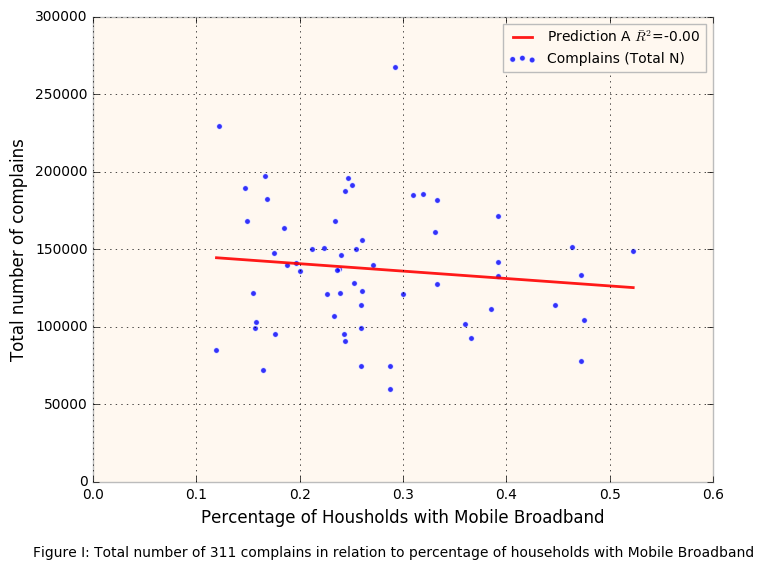

In [35]:
pl.figure(figsize=(8, 6))
pl.xlabel("Percentage of Housholds with Mobile Broadband")
pl.ylabel("Total number of complains")
#pl.ylim(0,7e10)

# Plot Complains
pl.scatter(regData.PercentageTotalHouseholdsWithMobileBroadBand, regData.Complains,  
           s=20, alpha=0.8,label='Complains (Total N)' )

# Plot first degree Polynomial
pl.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9, label='Prediction A $\\bar R^2$=%.2f' % est.rsquared_adj)


# Fitting second degree Polynomial
x = pd.DataFrame({'PercentageTotalHouseholdsWithMobileBroadBand': \
                  np.linspace(regData.PercentageTotalHouseholdsWithMobileBroadBand.min(),
                                      regData.Complains.max(), 40)})

# 2-nd order polynomial
poly_2 = smf.ols(formula='Complains ~ 1 + PercentageTotalHouseholdsWithMobileBroadBand + \
                 I(PercentageTotalHouseholdsWithMobileBroadBand ** 2.0)', 
                 data=regData).fit()

# pl.plot(x, poly_2.predict(x), 'g-', label='Prediction B $\\bar R^2$=%.2f' % poly_2.rsquared_adj, 
#         alpha=0.9)

pl.legend(loc='best')
figtext(0.05,-.00001,"Figure I: Total number of 311 complains in relation to percentage of households with Mobile Broadband")

In [36]:
# Second Attempt: using the Median Household income as a demographic characteristic
merged_data.rename(columns={'Median household income (In 2014 Inflation Adjusted Dollars)' : 'MHI'}, inplace=True)

In [37]:
regData = merged_data[['Complains','MHI']]

# Lets predict
y = regData.Complains  # response
X = regData.MHI  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

# use the sm OLS method passing the y (existing data for what I want to predict) and the predictor X
est = (sm.OLS(y, X))

# run the fit method
est = est.fit()

# Pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(X.MHI.min(),
                      X.MHI.max(), 40)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before

# Now we calculate the predicted values
y_hat = est.predict(X_prime)

print (est.summary())

                            OLS Regression Results                            
Dep. Variable:              Complains   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                   0.05241
Date:                Wed, 16 Nov 2016   Prob (F-statistic):              0.820
Time:                        02:33:36   Log-Likelihood:                -709.87
No. Observations:                  59   AIC:                             1424.
Df Residuals:                      57   BIC:                             1428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.401e+05   1.28e+04     10.933      0.0

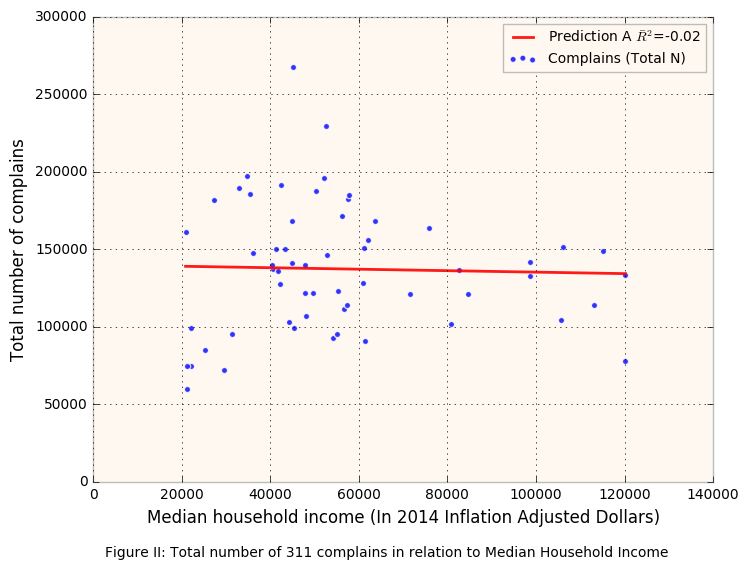

In [44]:
pl.figure(figsize=(8, 6))
pl.xlabel("Median household income (In 2014 Inflation Adjusted Dollars)")
pl.ylabel("Total number of complains")
#pl.ylim(0,7e10)

# Plot Complains
pl.scatter(regData.MHI, regData.Complains,  
           s=20, alpha=0.8,label='Complains (Total N)' )

# Plot first degree Polynomial
pl.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9, label='Prediction A $\\bar R^2$=%.2f' % est.rsquared_adj)


# Fitting second degree Polynomial
x = pd.DataFrame({'MHI': np.linspace(regData.MHI.min(), regData.Complains.max(), 40)})

# 2-nd order polynomial
poly_2 = smf.ols(formula='Complains ~ 1 + MHI + \
                 I(MHI ** 2.0)', 
                 data=regData).fit()

# pl.plot(x, poly_2.predict(x), 'g-', label='Prediction B $\\bar R^2$=%.2f' % poly_2.rsquared_adj, 
#         alpha=0.9)

pl.legend(loc='best')
figtext(0.14,-.00001,"Figure II: Total number of 311 complains in relation to Median Household Income")